# Hands on: Introduction to data annotation using identifiers

In [1]:
!pip install -q -r requirements.txt

## 1. Example data set 3

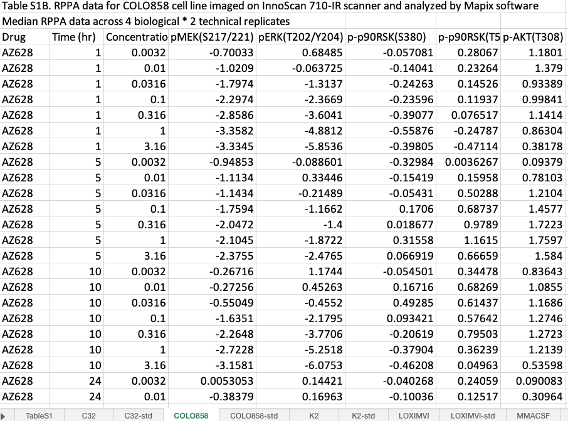

- Experimental factors:
 - cell lines (tabs): LOXIMVI, COLO858, etc.
 - drugs (rows): AZ628, Selumetinib, Vemurafenib, etc.
 - antibodies for protein abundance/PTM status (columns): MEK, ERK, p90RSK, etc.

In [1]:
import pandas as pd

DATA_PATH = '../data/fallahi_data.xlsx'

sheets = pd.read_excel(DATA_PATH, sheet_name=None, skiprows=2)

In [2]:
sheets

{'TableS1':                                            Unnamed: 0
 0   Table S1A. RPPA data for C32 cell line imaged ...
 1   Table S1B. RPPA data for COLO858 cell line ima...
 2   Table S1C. RPPA data for K2 cell line imaged o...
 3   Table S1D. RPPA data for LOXIMVI cell line ima...
 4   Table S1E. RPPA data for MMACSF cell line imag...
 5   Table S1F. RPPA data for MZ7MEL cell line imag...
 6   Table S1G. RPPA data for RVH421 cell line imag...
 7   Table S1H. RPPA data for SKMEL28 cell line ima...
 8   Table S1I. RPPA data for WM115 cell line image...
 9   Table S1J. RPPA data for WM1552C cell line ima...
 10                                                NaN
 11   Median/Std have been split into separate tables.,
 'C32':         AZ628   1  0.0032  0.22484  0.10692  NaN  0.01074   0.24791    0.3933  \
 0       AZ628   1  0.0100 -0.16601 -0.19265  NaN -0.31682  0.074960  0.233410   
 1       AZ628   1  0.0316 -0.64244 -1.14610  NaN -0.40092  0.040274  0.095077   
 2       AZ628   1  

In [3]:
sheet_names = list(sheets)
sheet_names

['TableS1',
 'C32',
 'C32-std',
 'COLO858',
 'COLO858-std',
 'K2',
 'K2-std',
 'LOXIMVI',
 'LOXIMVI-std',
 'MMACSF',
 'MMACSF-std',
 'MZ7MEL',
 'MZ7MEL-std',
 'RVH421',
 'RVH421-std',
 'SKMEL28',
 'SKMEL28-std',
 'WM115',
 'WM115-std',
 'WM1552C',
 'WM1552C-std']

In [4]:
cell_lines = [s for s in sheet_names if 'Table' not in s and '-std' not in s]
cell_lines

['C32',
 'COLO858',
 'K2',
 'LOXIMVI',
 'MMACSF',
 'MZ7MEL',
 'RVH421',
 'SKMEL28',
 'WM115',
 'WM1552C']

## How can we normalize text names to identifiers?

Gilda is a Python package and REST service that grounds (i.e., finds appropriate identifiers in namespaces for) named entities in biomedical text.

Gyori BM, Hoyt CT, Steppi A (2022). Gilda: biomedical entity text normalization with machine-learned disambiguation as a service. Bioinformatics Advances, 2022; vbac034 https://doi.org/10.1093/bioadv/vbac034.

In [3]:
import gilda

In [4]:
gilda.ground('C32')

[ScoredMatch(Term(c32,C32,EFO,0006364,C32,name,efo,None,None,None),0.7777777777777778,Match(query=C32,ref=C32,exact=True,space_mismatch=False,dash_mismatches={},cap_combos=[])),
 ScoredMatch(Term(c32,C32,HGNC,13253,CKLF,synonym,hgnc,9606,None,None),0.5555555555555556,Match(query=C32,ref=C32,exact=True,space_mismatch=False,dash_mismatches={},cap_combos=[]))]

In [5]:
matches = gilda.ground('C32')
print(matches[0].term)
matches = gilda.ground('LOXIMVI')
print(matches[0].term)
matches = gilda.ground('SKMEL28')
print(matches[0].term)
matches = gilda.ground('COLO858')
print(matches)

Term(c32,C32,EFO,0006364,C32,name,efo,None,None,None)
Term(loximvi,LOXIMVI,EFO,0006284,LOXIMVI,name,efo,None,None,None)
Term(skmel28,SK-MEL-28,EFO,0003081,SK-MEL-28,name,efo,None,None,None)
[]


Let's resolve LOXIMVI using its ID: https://bioregistry.io/EFO:0006284

Many cell lines couldn't be grounded using the default Gilda instance. For those interested, it's possible to customize Gilda with other resources, see: https://github.com/gyorilab/gilda/blob/master/notebooks/custom_grounders.ipynb, e.g., Cellosaurus, which contains a more systematic catalogue of cell lines.

In [9]:
df = sheets['LOXIMVI']
df

,Drug,Time (hr),Concentration (uM),pMEK(S217/221),pERK(T202/Y204),p-p90RSK(S380),p-p90RSK(T573),p-AKT(T308),p-AKT(S473),p-mTOR(S2448),...,p-JNK(T183/Y185),Total c-Jun,p-cJun(S63),p-P38(T180/Y182),p-HSP27(S82),p-NFKB(S536),Bim,cPARP,p-Histone H3(S10),p27 Kip1
0,AZ628,1,0.0032,0.79671,1.92250,0.693510,0.95871,NaN,1.030700,1.294000,...,1.601000,1.19060,1.61060,1.731500,1.524300,0.776550,1.80920,1.44660,0.23324,1.84360
1,AZ628,1,0.0100,0.34613,2.06110,0.653200,1.00940,NaN,1.343700,1.428700,...,1.775200,1.28160,1.82370,1.725300,1.261200,0.985020,2.07280,1.61360,0.44360,1.40240
2,AZ628,1,0.0316,-0.17426,1.47580,0.531690,0.87866,NaN,1.477500,1.341200,...,1.716700,1.26090,1.82310,1.437700,1.143800,0.970360,2.22710,1.61820,0.80767,1.17420
3,AZ628,1,0.1000,-0.53714,0.77338,0.631350,1.06920,NaN,1.483400,1.035600,...,1.411100,1.14720,1.92130,1.048600,1.356800,0.845850,2.19750,1.62300,0.79431,1.39630
4,AZ628,1,0.3160,-1.28310,-0.48519,0.644720,0.84908,NaN,1.605400,1.031200,...,1.330300,0.74568,1.81040,-0.269690,0.991100,0.718900,1.60500,1.25360,0.47505,1.76480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,SB590885,48,0.0316,-0.84192,-0.93416,0.231260,-0.65540,NaN,0.514670,0.365790,...,0.219610,-0.56826,-0.45860,-0.046925,-0.033998,0.116620,0.42773,0.29036,0.31432,-0.62735
171,SB590885,48,0.1000,-1.74070,-1.60260,0.049010,-0.48014,NaN,0.534460,0.018717,...,0.031661,-0.65894,-0.70742,-0.020500,-0.120410,0.019411,0.36881,0.17516,0.16177,-0.33856
172,SB590885,48,0.3160,-1.86090,-1.41040,0.300630,-0.32317,NaN,0.461400,0.476280,...,0.421190,-0.62106,-0.30036,0.085235,0.433510,0.284350,0.89159,0.42707,0.25295,0.40443
173,SB590885,48,1.0000,-2.37280,-1.59910,0.235590,-0.51840,NaN,0.013754,0.308200,...,0.213210,-1.04860,-0.44825,-0.183070,0.185150,0.420750,0.63868,0.17904,-0.14101,-0.27232


In [10]:
drugs = set(df.Drug)
drugs

{'AZ628', 'PLX4720', 'SB590885', 'Selumetinib', 'Vemurafenib'}

In [11]:
for drug in drugs:
    matches = gilda.ground(drug)
    if matches:
        print('%s: %s' % (drug, matches[0].term))
    else:
        print('%s could not be grounded' % drug)

Vemurafenib: Term(vemurafenib,Vemurafenib,CHEBI,CHEBI:63637,vemurafenib,curated,famplex,None,None,None)
Selumetinib: Term(selumetinib,selumetinib,CHEBI,CHEBI:90227,selumetinib,name,chebi,None,None,None)
SB590885: Term(sb590885,SB-590885,CHEBI,CHEBI:131882,SB-590885,name,chebi,None,None,None)
PLX4720: Term(plx4720,PLX-4720,CHEBI,CHEBI:90295,PLX-4720,name,chebi,None,None,None)
AZ628: Term(az628,AZ-628,MESH,C000592454,AZ-628,name,mesh,None,None,None)


In [12]:
import bioregistry

Given any of these IDs, you can resolve them using the Bioregistry as e.g. https://bioregistry.io/CHEBI:131882. You can also find out how the ID gets resolved by Bioregistry as

In [13]:
bioregistry.get_default_iri('CHEBI', '131882')

'http://purl.obolibrary.org/obo/CHEBI_131882'

## 2. Example Dataset 1

We use an example dataset produced from an MSstats differential abundance analysis.  This dataset is a small molecule dataset with known inhibition targets.  It includes 8 small molecule inhibitors and a control DMSO holdout. 

In [6]:
DATA_PATH = "../data/ProteinLevelData.csv"
input_data = pd.read_csv(DATA_PATH)
input_data

,RUN,Protein,LogIntensities,originalRUN,GROUP,SUBJECT,TotalGroupMeasurements,NumMeasuredFeature,MissingPercentage,more50missing,NumImputedFeature
0,1,1433B_HUMAN,12.873423,230719_THP-1_Chrom_end2end_Plate1_DMSO_A02_DIA,DMSO,2,1210,10,0.0,False,0
1,2,1433B_HUMAN,12.866217,230719_THP-1_Chrom_end2end_Plate1_DMSO_A05_DIA,DMSO,5,1210,10,0.0,False,0
2,3,1433B_HUMAN,12.686827,230719_THP-1_Chrom_end2end_Plate1_DMSO_A10_DIA,DMSO,10,1210,10,0.0,False,0
3,4,1433B_HUMAN,12.625462,230719_THP-1_Chrom_end2end_Plate1_DMSO_A12_DIA,DMSO,12,1210,10,0.0,False,0
4,5,1433B_HUMAN,12.538365,230719_THP-1_Chrom_end2end_Plate1_DMSO_B01_DIA,DMSO,13,1210,10,0.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...
1189821,266,ZZZ3_HUMAN,10.384438,230719_THP-1_Chrom_end2end_Plate3_DMSO_A10,VTP50469,202,170,10,0.0,False,0
1189822,267,ZZZ3_HUMAN,10.231615,230719_THP-1_Chrom_end2end_Plate3_DMSO_B03,VTP50469,207,170,10,0.0,False,0
1189823,268,ZZZ3_HUMAN,10.502691,230719_THP-1_Chrom_end2end_Plate3_DbET6_C07,VTP50469,223,170,10,0.0,False,0
1189824,269,ZZZ3_HUMAN,10.674776,230719_THP-1_Chrom_end2end_Plate3_DMSO_C11,VTP50469,227,170,10,0.0,False,0


### Experimental Factors:
| Treatment    | Nominal target |
| :-------- | :------- |
| DMSO  | Control    |
| VTP50469  | MEN1    |
| PF477736 | Chk1    |
| Jakafi    | JAK1/2    |
| K-975  | TEAD1   |
| VE-821 | ATR    |
| dBET6    | BRD2/3/4   |


Our first goal is to make this data set interoperable and connected to other data sets and surrounding knowledge.  This means we must normalize experimental factors to identifiers

## How can we normalize text names to identifiers?

In [7]:
import gilda

For each drug, we can ground their names using gilda.

In [11]:
gilda.ground('PF-477736')[0].term

Term(pf477736,PF-477736,CHEBI,CHEBI:91385,PF-00477736,synonym,chebi,None,None,None)

In [12]:
gilda.ground('Jakafi')[0].term

Term(jakafi,Jakafi,CHEBI,CHEBI:66917,ruxolitinib phosphate,synonym,chebi,None,None,None)

We can also ground target names.  For example, CHK1 is grounded to CHEK1

In [15]:
gilda.ground('Chk1')[0].term

Term(chk1,CHK1,HGNC,1925,CHEK1,curated,famplex,9606,None,None)

Gilda has a REST service that accepts POST requests with a JSON header on the /ground endpoint. There is a public REST service running at http://grounding.indra.bio

In [19]:
import requests
res = requests.post('http://grounding.indra.bio/ground', json={'text': 'Jakafi'})
res.json()

[{'match': {'cap_combos': [],
   'dash_mismatches': [],
   'exact': True,
   'query': 'Jakafi',
   'ref': 'Jakafi',
   'space_mismatch': False},
  'score': 0.5555555555555556,
  'term': {'db': 'CHEBI',
   'entry_name': 'ruxolitinib phosphate',
   'id': 'CHEBI:66917',
   'norm_text': 'jakafi',
   'source': 'chebi',
   'status': 'synonym',
   'text': 'Jakafi'},
  'url': 'https://identifiers.org/CHEBI:66917'}]

The Bioregistry supports converting a CURIE to a canonical CURIE by normalizing the prefix and removing redundant namespaces embedded in LUIs with the normalize_curie() function

In [20]:
# CHEBIID is an alternative prefix for chebi
bioregistry.normalize_curie('CHEBIID:66917')

'chebi:66917'

We can determine whether an ID is a valid identifier within a particular namespace.  In the below example, we demonstrate how the bioregistry package can determine whether an ID is a valid uniprot ID.

In [21]:
print(bioregistry.is_valid_identifier('uniprot', '1433B_HUMAN')) # uniprot mnemonic ID
print(bioregistry.is_valid_identifier('uniprot', 'YWHAB')) # corresponding gene name
print(bioregistry.is_valid_identifier('uniprot', 'P31946')) # corresponding uniprot ID

False
False
True


Bioregistry can also provide a URL to access information on the identifier

In [22]:
bioregistry.resolve_identifier.get_default_iri('uniprot', 'P31946')

'https://purl.uniprot.org/uniprot/P31946'

## 3. Identifier mapping

There are many overlapping databases for proteins, small molecules, etc., and even within the same database like UniProt, people refer to an entry using different types of IDs or names. We need to be able to map between these. 

This dataset uses UniProt mnemonics to identify proteins. Let's see how we can map these to UniProt identifiers, and also to the corresponding human gene ID and symbol.

The documentation for various clients in INDRA that can be used for identifier mapping and ID-to-name lookup is here: https://indra.readthedocs.io/en/latest/modules/databases/index.html

In [16]:
from indra.databases import uniprot_client

In [17]:
uniprot_client.get_id_from_mnemonic('1433B_HUMAN')

'P31946'

In [18]:
uniprot_client.get_hgnc_id('P31946')

'12849'

In [19]:
uniprot_client.get_gene_name('P31946')

'YWHAB'

## Exercise

Iterate over all the proteins in the data set and find the corresponding UniProt ID, then map that to an HGNC ID. Print the results or store it in a data structure like a dictionary or data frame. Do you notice any issues like things that can't be correctly mapped?

In [20]:
input_data

,RUN,Protein,LogIntensities,originalRUN,GROUP,SUBJECT,TotalGroupMeasurements,NumMeasuredFeature,MissingPercentage,more50missing,NumImputedFeature
0,1,1433B_HUMAN,12.873423,230719_THP-1_Chrom_end2end_Plate1_DMSO_A02_DIA,DMSO,2,1210,10,0.0,False,0
1,2,1433B_HUMAN,12.866217,230719_THP-1_Chrom_end2end_Plate1_DMSO_A05_DIA,DMSO,5,1210,10,0.0,False,0
2,3,1433B_HUMAN,12.686827,230719_THP-1_Chrom_end2end_Plate1_DMSO_A10_DIA,DMSO,10,1210,10,0.0,False,0
3,4,1433B_HUMAN,12.625462,230719_THP-1_Chrom_end2end_Plate1_DMSO_A12_DIA,DMSO,12,1210,10,0.0,False,0
4,5,1433B_HUMAN,12.538365,230719_THP-1_Chrom_end2end_Plate1_DMSO_B01_DIA,DMSO,13,1210,10,0.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...
1189821,266,ZZZ3_HUMAN,10.384438,230719_THP-1_Chrom_end2end_Plate3_DMSO_A10,VTP50469,202,170,10,0.0,False,0
1189822,267,ZZZ3_HUMAN,10.231615,230719_THP-1_Chrom_end2end_Plate3_DMSO_B03,VTP50469,207,170,10,0.0,False,0
1189823,268,ZZZ3_HUMAN,10.502691,230719_THP-1_Chrom_end2end_Plate3_DbET6_C07,VTP50469,223,170,10,0.0,False,0
1189824,269,ZZZ3_HUMAN,10.674776,230719_THP-1_Chrom_end2end_Plate3_DMSO_C11,VTP50469,227,170,10,0.0,False,0


In [27]:
uniprot_mnemonics = set(input_data["Protein"])

In [28]:
uniprot_mnemonics

{'IF4G1_HUMAN',
 'LAR1B_HUMAN',
 'NEP1_HUMAN',
 'NSE1_HUMAN',
 'KDM5B_HUMAN',
 'U5S1_HUMAN',
 'GYS2_HUMAN',
 'RL5_HUMAN',
 'RLF_HUMAN',
 'DSN1_HUMAN',
 'MCM3_HUMAN',
 'KICS2_HUMAN',
 'DHB8_HUMAN',
 'RM01_HUMAN',
 'DACH2_HUMAN',
 'MEST_HUMAN',
 'PPIL1_HUMAN',
 'SIR7_HUMAN',
 'MA2A1_HUMAN',
 'SQOR_HUMAN',
 'THMS2_HUMAN',
 'PP2BB_HUMAN',
 'CUTC_HUMAN',
 'VPS4B_HUMAN',
 'RM11_HUMAN',
 'RALA_HUMAN',
 'SNF5_HUMAN',
 'MED20_HUMAN',
 'ABRX1_HUMAN',
 'CF298_HUMAN',
 'ATD3A_HUMAN',
 'DJC11_HUMAN',
 'PECR_HUMAN',
 'CLAP2_HUMAN',
 'PPWD1_HUMAN',
 'FMNL1_HUMAN',
 'PTH2_HUMAN',
 'TM177_HUMAN',
 'MKRN2_HUMAN',
 'RGS19_HUMAN',
 'HMGB2_HUMAN',
 'TRIP4_HUMAN',
 'K2C75_HUMAN',
 'DDX51_HUMAN',
 'RL4_HUMAN',
 'MA1B1_HUMAN',
 'PDS5A_HUMAN',
 'PPIH_HUMAN',
 'CHM2A_HUMAN',
 'SPF27_HUMAN',
 'COX6C_HUMAN',
 'SAFB1_HUMAN',
 'PPID_HUMAN',
 'RECQ4_HUMAN',
 'ZBT11_HUMAN',
 'ODPA_HUMAN',
 'G3P_HUMAN',
 'NOM1_HUMAN',
 'MCA3_HUMAN',
 'WASC3_HUMAN',
 'SMRD3_HUMAN',
 'ANM1_HUMAN',
 'CAP1_HUMAN',
 'MTX2_HUMAN',
 'AP5Z1_H

In [31]:
uniprot_ids = []
for mnemonic in uniprot_mnemonics:
    uniprot_id = uniprot_client.get_id_from_mnemonic(mnemonic)
    if uniprot_id is not None:
        uniprot_ids.append(uniprot_id)
    else:
        print(mnemonic)

CL029_HUMAN
TT30A_HUMAN
PAIRB_HUMAN
AKAP2_HUMAN
TTC37_HUMAN
NIPA_HUMAN
MET7B_HUMAN
MPCP_HUMAN
CMC1_HUMAN
AFG2H_HUMAN
F102B_HUMAN
CT027_HUMAN
TT30B_HUMAN
MIO_HUMAN
SKIV2_HUMAN
SNUT2_HUMAN
CYHR1_HUMAN
TRUA_HUMAN
CMC2_HUMAN
SL7A1_HUMAN
CG026_HUMAN
PKCB1_HUMAN
URFB1_HUMAN
SPA5L_HUMAN
WDR61_HUMAN
NO40_HUMAN
UH1BL_HUMAN


In [32]:
len(uniprot_ids)

4976

In [33]:
hgnc_ids = []
for uniprot_id in uniprot_ids:
    hgnc_id = uniprot_client.get_hgnc_id(uniprot_id)
    if hgnc_id is not None:
        hgnc_ids.append(hgnc_id)
    else:
        print(uniprot_id)

A6NEC2
A8MVJ9
Q6ZT62
Q6ZSR9
G9CGD6


In [34]:
len(hgnc_ids)

4971

In [35]:
hgnc_ids

['3296',
 '24704',
 '16912',
 '29897',
 '18039',
 '30858',
 '4707',
 '10360',
 '10025',
 '16165',
 '6945',
 '26517',
 '3554',
 '14275',
 '16814',
 '7028',
 '9260',
 '14935',
 '6824',
 '20390',
 '16839',
 '9315',
 '24271',
 '10895',
 '14042',
 '9839',
 '11103',
 '16840',
 '25829',
 '1301',
 '25567',
 '25570',
 '18281',
 '17078',
 '28954',
 '1212',
 '24265',
 '28143',
 '7113',
 '13735',
 '5000',
 '12310',
 '24431',
 '20082',
 '10353',
 '6823',
 '29088',
 '14651',
 '30216',
 '975',
 '2285',
 '10520',
 '9257',
 '9949',
 '16740',
 '8806',
 '4141',
 '13244',
 '3212',
 '24256',
 '11108',
 '5187',
 '20040',
 '7506',
 '22197',
 '6111',
 '14504',
 '1834',
 '32151',
 '2451',
 '9391',
 '18235',
 '6518',
 '31792',
 '9194',
 '28313',
 '28413',
 '7996',
 '12886',
 '2681',
 '24448',
 '15720',
 '2961',
 '17556',
 '25893',
 '1006',
 '17102',
 '3542',
 '9356',
 '2664',
 '21378',
 '6703',
 '10719',
 '14497',
 '16691',
 '20886',
 '14525',
 '14193',
 '15807',
 '2720',
 '24515',
 '7544',
 '9071',
 '564',
 '1

In [36]:
from indra.databases import hgnc_client

In [37]:
hgnc_client.get_hgnc_name('3296')

'EIF4G1'